# Exercise 6

Written by: Muhammad Emizr. Aalto University
Autumn 2020.

For symbolic calculation of $exp(At)$ we will use `sympy`.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy
import seaborn as sns
from sympy import symbols, Matrix, simplify
from scipy.integrate import odeint
#sns.set('talk')
#plt.rc('text', usetex=True)
#plt.rc('font', family='serif')

Declare some variables.

In [2]:
k, eta, m, s = symbols('k eta m s', real=True, nonnegative=True)
t = symbols('t', real=True, positive=True)

In [3]:
A = Matrix([[0,1],[-k/m,-eta/m]])

In [4]:
A

Matrix([
[   0,      1],
[-k/m, -eta/m]])

Evaluate $exp(At)$ symbolically.

In [5]:
exp_A_t = simplify(sympy.exp(A*t))

In [6]:
exp_A_t

Matrix([
[(eta*exp(t*sqrt(eta**2 - 4*k*m)/m) - eta + sqrt(eta**2 - 4*k*m)*exp(t*sqrt(eta**2 - 4*k*m)/m) + sqrt(eta**2 - 4*k*m))*exp(-eta*t/(2*m) - t*sqrt(eta**2 - 4*k*m)/(2*m))/(2*sqrt(eta**2 - 4*k*m)), m*(eta*exp(t*sqrt(eta**2 - 4*k*m)/m) - eta + sqrt(eta**2 - 4*k*m)*exp(t*sqrt(eta**2 - 4*k*m)/m) - sqrt(eta**2 - 4*k*m))*exp(-t*(eta + sqrt(eta**2 - 4*k*m))/(2*m))/(eta**2 + eta*sqrt(eta**2 - 4*k*m) - 4*k*m)],
[                                                                   k*(exp(t*(eta - sqrt(eta**2 - 4*k*m))/(2*m)) - exp(t*(eta + sqrt(eta**2 - 4*k*m))/(2*m)))*exp(-eta*t/m)/sqrt(eta**2 - 4*k*m),                                     (-eta**2 - eta*sqrt(eta**2 - 4*k*m) + 2*k*m*exp(t*sqrt(eta**2 - 4*k*m)/m) + 2*k*m)*exp(-t*(eta + sqrt(eta**2 - 4*k*m))/(2*m))/(-eta**2 - eta*sqrt(eta**2 - 4*k*m) + 4*k*m)]])

Declare other variables for initial condition.

In [7]:
p_0, v_0 = symbols('p_0 v_0', real=True, nonnegative=True)

In [8]:
x_0 = Matrix([[p_0],[v_0]])

Analytic solution of $x_t = exp(At) x_0$.

In [9]:
x_t = simplify(exp_A_t*x_0)

In [10]:
x_t

Matrix([
[(m*v_0*sqrt(eta**2 - 4*k*m)*(eta*exp(t*sqrt(eta**2 - 4*k*m)/m) - eta + sqrt(eta**2 - 4*k*m)*exp(t*sqrt(eta**2 - 4*k*m)/m) - sqrt(eta**2 - 4*k*m)) + p_0*(eta**2 + eta*sqrt(eta**2 - 4*k*m) - 4*k*m)*(eta*exp(t*sqrt(eta**2 - 4*k*m)/m) - eta + sqrt(eta**2 - 4*k*m)*exp(t*sqrt(eta**2 - 4*k*m)/m) + sqrt(eta**2 - 4*k*m))/2)*exp(-t*(eta + sqrt(eta**2 - 4*k*m))/(2*m))/(sqrt(eta**2 - 4*k*m)*(eta**2 + eta*sqrt(eta**2 - 4*k*m) - 4*k*m))],
[           (k*p_0*(exp(t*(eta - sqrt(eta**2 - 4*k*m))/(2*m)) - exp(t*(eta + sqrt(eta**2 - 4*k*m))/(2*m)))*(eta**2 + eta*sqrt(eta**2 - 4*k*m) - 4*k*m)*exp(t*(eta + sqrt(eta**2 - 4*k*m))/(2*m)) + v_0*sqrt(eta**2 - 4*k*m)*(eta**2 + eta*sqrt(eta**2 - 4*k*m) - 2*k*m*exp(t*sqrt(eta**2 - 4*k*m)/m) - 2*k*m)*exp(eta*t/m))*exp(-t*(3*eta + sqrt(eta**2 - 4*k*m))/(2*m))/(sqrt(eta**2 - 4*k*m)*(eta**2 + eta*sqrt(eta**2 - 4*k*m) - 4*k*m))]])

Now we do the numerical stuff. Which is basically substituting the numerical value to the analytical expression.

In [11]:
k_val = 100.
m_val = 0.5
eta_val = 0.01
p0_val = 1.
v0_val = 0.1
A_np = np.asarray(A.subs({k: k_val, eta: eta_val, m:m_val})).astype(np.float32)

Same also with the $x$.

In [12]:
x_t_ = x_t.subs({k: k_val, eta: eta_val, m:m_val, p_0:p0_val, v_0:v0_val})

Analytic solution for system without input.

In [13]:
t_val = np.linspace(0,1.,201)
x_analytic = np.zeros((t_val.shape[0],2), dtype=np.complex64)
for i in range(t_val.shape[0]):
    x_analytic[i] = np.asarray(x_t_.subs({t:t_val[i]})).flatten().astype(np.complex64)
x_analytic = x_analytic.real

Text(0, 0.5, '\\mathbf{x}$')

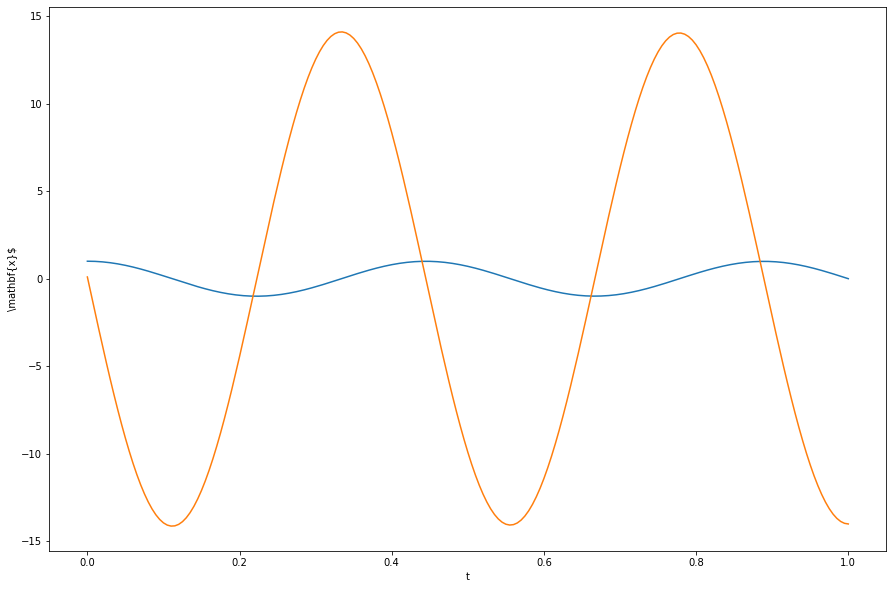

In [14]:
plt.figure(figsize=(15,10))
plt.plot(t_val,x_analytic.real)
plt.xlabel('t')
plt.ylabel('\mathbf{x}$')

In [15]:
dt = t_val[1]-t_val[0]

In [16]:
B_u = np.array([0., 10.])
def linear_system(t_now, x_now,u_now):
    return A_np@x_now + B_u*u_now

In [16]:
def euler(f,t_now, x_now,u_now, dt):
    return x_now + f(t_now, x_now,u_now)*dt

def euler_propagate(f,t, x_init,u,dt):
    x_res = np.zeros((u.shape[0],2))
    x_res[0] = x_init
    for i in range(x_res.shape[0]-1):
        x_res[i+1] = euler(f,t[i], x_res[i],u[i],dt)
    return x_res

Instead of using `scipy.integrate.odeinit`, for comparison to the Euler solver we use the [_Runge Kutta 4_ method](https://en.wikipedia.org/wiki/Runge%E2%80%93Kutta_methods).

In [17]:
def rk4(f,t_now, x_now,u_now, dt):
    k1 = f(t_now, x_now,u_now)
    k2 = f(t_now+0.5*dt,x_now+0.5*dt*k1,u_now)
    k3 = f(t_now+0.5*dt, x_now+0.5*dt*k2,u_now)
    k4 = f(t_now+dt, x_now+dt*k3,u_now)
    return x_now+dt*(k1+2*k2+2*k3+k4)/6


def rk4_propagate(f,t, x_init,u,dt):
    x_res = np.zeros((u.shape[0],2))
    x_res[0] = x_init
    for i in range(x_res.shape[0]-1):
        x_res[i+1] = rk4(f,t[i], x_res[i],u[i],dt)
    return x_res

In [18]:
u_0 = np.zeros(t_val.shape)

In [19]:
u_1 = np.ones(t_val.shape)

In [20]:
u_sin = np.sin(t_val*2*np.pi/0.1)

In [21]:
u_t = t_val.copy()

In [22]:
x_init = x_analytic[0].real

In [23]:
x_u_0 = euler_propagate(linear_system,t_val,x_init,u_0, dt)

In [24]:
x_u_0_rk = rk4_propagate(linear_system,t_val,x_init,u_0, dt)

Analytical solution and the RK solution are almost undistinguishable. RK4 has total accumulated error of $\mathcal{O}(dt^4)$, while Euler is much bigger than that?.
How much is it?

Text(0, 0.5, '$x_0$')

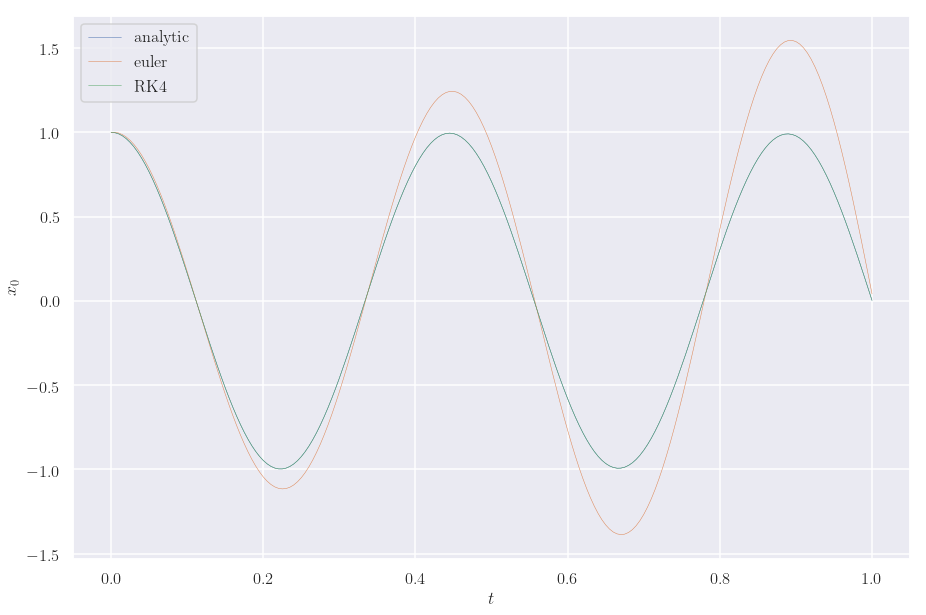

In [25]:
plt.figure(figsize=(15,10))
plt.plot(t_val,x_analytic[:,0],label = 'analytic', linewidth=0.5)
plt.plot(t_val,x_u_0[:,0],label = 'euler', linewidth=0.5)
plt.plot(t_val,x_u_0_rk[:,0],label = 'RK4', linewidth=0.5)
plt.legend()
plt.xlabel('$t$')
plt.ylabel('$x_0$')

Text(0, 0.5, '$x_1$')

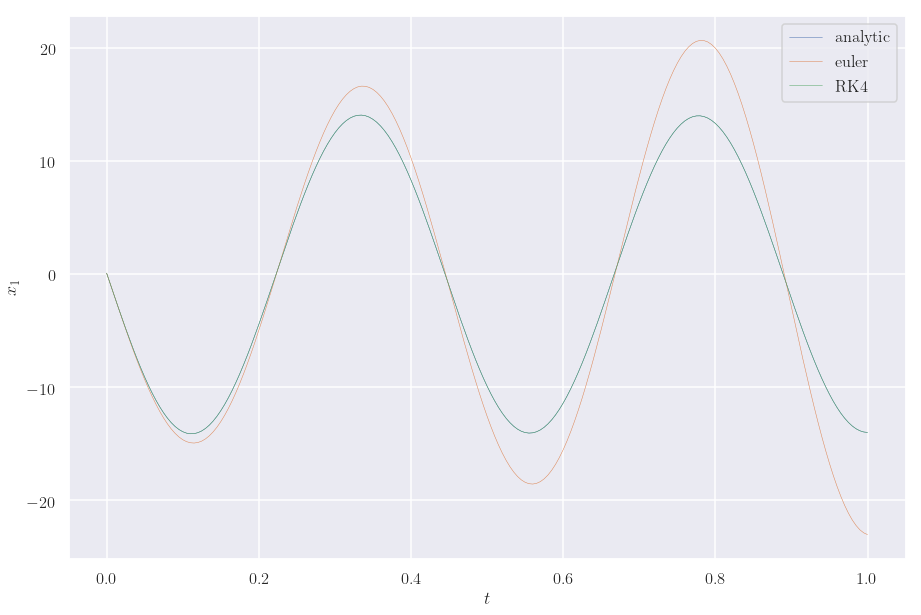

In [26]:
plt.figure(figsize=(15,10))
plt.plot(t_val,x_analytic[:,1],label = 'analytic', linewidth=0.5)
plt.plot(t_val,x_u_0[:,1],label = 'euler', linewidth=0.5)
plt.plot(t_val,x_u_0_rk[:,1],label = 'RK4', linewidth=0.5)
plt.legend()
plt.xlabel('$t$')
plt.ylabel('$x_1$')

In [27]:
x_u_1 = euler_propagate(linear_system,t_val,x_init,u_1, dt)
x_u_1_rk = rk4_propagate(linear_system,t_val,x_init,u_1, dt)

Text(0, 0.5, '$x_1$')

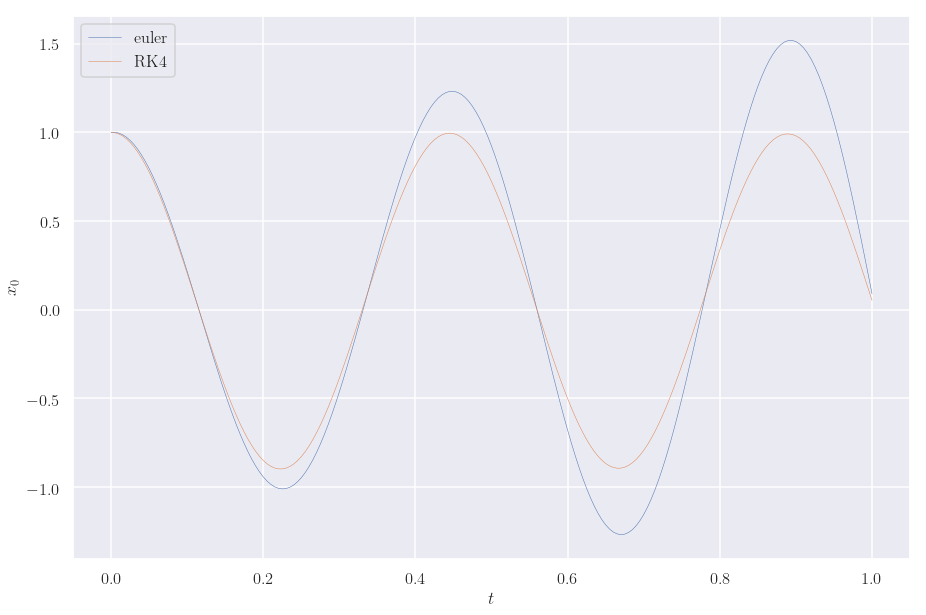

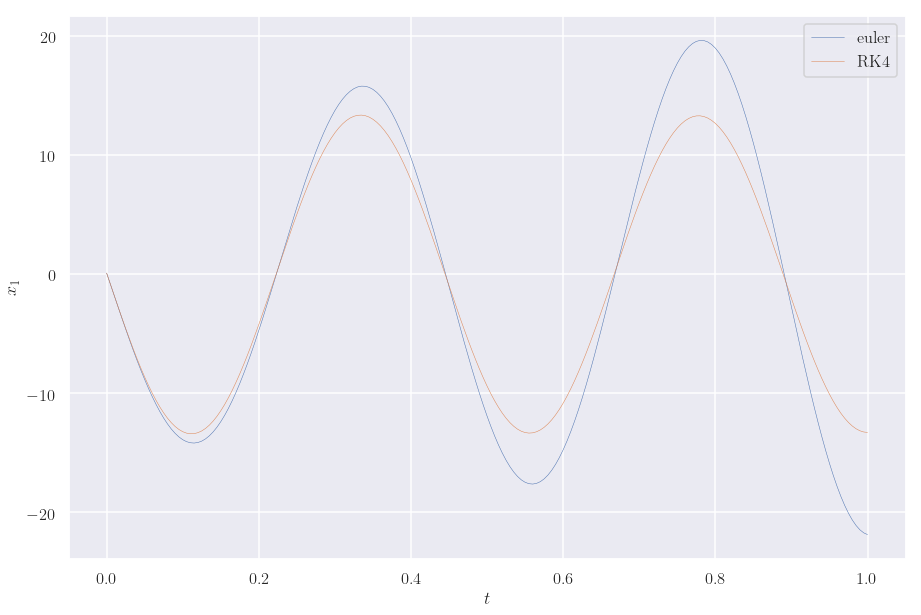

In [28]:
plt.figure(figsize=(15,10))
plt.plot(t_val,x_u_1[:,0],label = 'euler', linewidth=0.5)
plt.plot(t_val,x_u_1_rk[:,0],label = 'RK4', linewidth=0.5)
plt.legend()
plt.xlabel('$t$')
plt.ylabel('$x_0$')
plt.figure(figsize=(15,10))
plt.plot(t_val,x_u_1[:,1],label = 'euler', linewidth=0.5)
plt.plot(t_val,x_u_1_rk[:,1],label = 'RK4', linewidth=0.5)
plt.legend()
plt.xlabel('$t$')
plt.ylabel('$x_1$')

You could derive the analytical solution for the case with $u \neq 0$ or use `sympy` as above. Then do the substitution as above. Afterthat you could plot the results for $u \neq 0$ as in the case $u = 0$.